## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataframe using an inner join and display dataframe.
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "inner")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID + Timepoint,Unnamed: 5,Drug Regimen,Sex,Age_months,Weight (g)
0,x401,40,28.167397,0,x40140,NaN,Capomulin,Female,16,15
1,x401,45,28.484033,0,x40145,NaN,Capomulin,Female,16,15
2,x401,35,30.206825,0,x40135,NaN,Capomulin,Female,16,15
3,x401,30,32.915292,0,x40130,NaN,Capomulin,Female,16,15
4,x401,20,36.065835,0,x40120,NaN,Capomulin,Female,16,15


In [4]:
# Add a column to hold concatenation of Mouse ID and Timepoint columns. This will be used to locate
# duplicated mouse trial data points. Then drop all unneeded columns.
df["Mouse ID Timepoint"] = df["Mouse ID"] + df["Timepoint"].apply(str)
df = df.drop(["Metastatic Sites", "Unnamed: 5", "Age_months"], axis = 1)

In [5]:
# Display head of df.
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Mouse ID + Timepoint,Drug Regimen,Sex,Weight (g),Mouse ID Timepoint
0,x401,40,28.167397,x40140,Capomulin,Female,15,x40140
1,x401,45,28.484033,x40145,Capomulin,Female,15,x40145
2,x401,35,30.206825,x40135,Capomulin,Female,15,x40135
3,x401,30,32.915292,x40130,Capomulin,Female,15,x40130
4,x401,20,36.065835,x40120,Capomulin,Female,15,x40120


In [6]:
# Display basic stats of numeric columns.
df.describe()

,Timepoint,Tumor Volume (mm3),Weight (g)
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,25.662441
std,14.079460,8.894722,3.921622
min,0.000000,22.050126,15.000000
25%,5.000000,45.000000,25.000000
50%,20.000000,48.951474,27.000000
75%,30.000000,56.292200,29.000000
max,45.000000,78.567014,30.000000


In [7]:
# Compute and display number of total mouse trial datapoints, number of unique mouse trial datapoints, and number of duplicated mouse trial datapoints.
# A 'mouse trial datapoint' is a unique timepoint for a unique mouse ID, e.g., mouse x401 at time 0, mouse x401 at time 15..., mouse x401 at time 45.

# Check number of mouse trials in df (include duplicates).
print("Number of mouse trials: " + str(df["Mouse ID Timepoint"].count()))
# Check number of unique mouse trials in df.
print("Number of unique mouse trials: " + str(df["Mouse ID Timepoint"].nunique()))
# Check number of duplicates. These will need to be removed.
print("There are " + str(df["Mouse ID Timepoint"].count() - df["Mouse ID Timepoint"].nunique()) + " duplicated mouse trials." )

Number of mouse trials: 1893
Number of unique mouse trials: 1888
There are 5 duplicated mouse trials.


In [8]:
# Drop the duplicate rows from df. (This only dropped one row for some reason...)
clean_df = df.drop_duplicates(keep = "first")

In [9]:
# Check number of mouse trials in df (include duplicates).
print("Number of mouse trials: " + str(clean_df["Mouse ID Timepoint"].count()))
# Check number of unique mouse trials in df.
print("Number of unique mouse trials: " + str(clean_df["Mouse ID Timepoint"].nunique()))
# Check number of duplicates. These will need to be removed.
print("There are still " + str(clean_df["Mouse ID Timepoint"].count() - clean_df["Mouse ID Timepoint"].nunique()) + " duplicated mouse trials, argh!" )

Number of mouse trials: 1892
Number of unique mouse trials: 1888
There are still 4 duplicated mouse trials, argh!


## Summary Statistics

In [10]:
# Generate summary statistics by drug regimen.

functions = ["mean", "median", "var", "std", "sem"]
gb = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(functions).reset_index()
gb

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.368318  50.909965  42.278090  6.502160  0.514041
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

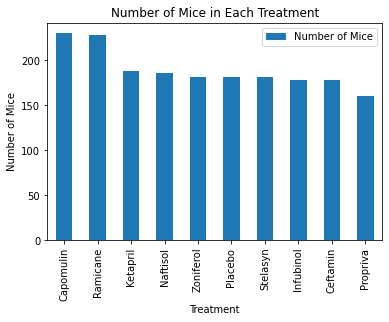

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
x_axis_data = [x for x in gb["Drug Regimen"]]
y_axis_data = clean_df["Drug Regimen"].value_counts()
plot_data = pd.DataFrame({"Drug Regimens": x_axis_data, "Number of Mice": y_axis_data})
bar_plot = plot_data.plot(kind = "bar", title = "Number of Mice in Each Treatment")
bar_plot.set_xlabel("Treatment")
bar_plot.set_ylabel("Number of Mice")

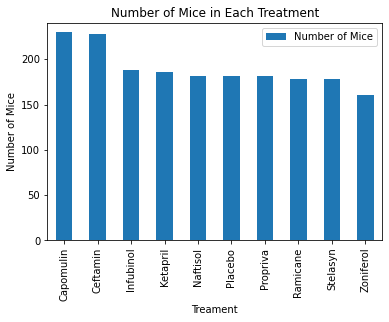

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bar_plot = plt.bar(x_axis_data, y_axis_data, label = "Number of Mice", width = 0.5)
plt.xticks(rotation = 90)
plt.title("Number of Mice in Each Treatment")
plt.xlabel("Treament")
plt.ylabel("Number of Mice")
plt.xlim(-0.5, 9.5)
plt.ylim(0, 240)
plt.legend(loc = "upper right")
plt.show()

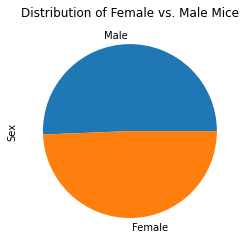

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = clean_df["Sex"].value_counts()
sex_df.to_frame()
sex_df.plot(kind = "pie", y = sex_df, title = "Distribution of Female vs. Male Mice")

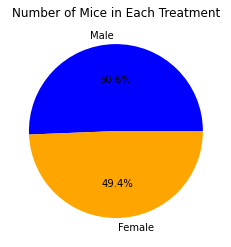

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = plt.pie(sex_df, labels = ["Male", "Female"], colors = ["blue", "orange"], autopct="%1.1f%%")
plt.title("Number of Mice in Each Treatment")
plt.show()

## Screen for Tumor Size Outliers Using Quartiles, IQR, and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group and aggregate to reduce dataframe to only the final timepoint for each mouse
last_timepoint_df = clean_df.groupby(["Mouse ID"]).agg({"Timepoint": max})

# Merge this reduced df with the original dataframe to access corresponding tumor volume information.
# Merge left to include only the final timepoints.
merged_df = pd.merge(last_timepoint_df, clean_df, how = "left", on = ["Mouse ID", "Timepoint"])
# Calculate the IQR and quantitatively determine if there are any potential outliers. merged_df
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Mouse ID + Timepoint,Drug Regimen,Sex,Weight (g),Mouse ID Timepoint
0,a203,45,67.973419,a20345,Infubinol,Female,23,a20345
1,a251,45,65.525743,a25145,Infubinol,Female,25,a25145
2,a262,45,70.717621,a26245,Placebo,Female,29,a26245
3,a275,45,62.999356,a27545,Ceftamin,Female,28,a27545
4,a366,30,63.440686,a36630,Stelasyn,Female,29,a36630
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,z43510,Propriva,Female,26,z43510
245,z578,45,30.638696,z57845,Ramicane,Male,16,z57845
246,z581,45,62.754451,z58145,Infubinol,Female,25,z58145
247,z795,45,65.741070,z79545,Naftisol,Female,29,z79545


In [16]:
# Construct lists of treatments and final tumor volumes by treatment.

# Treatment list
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Tumor volume list
tumor_volumes_Capomulin = []
tumor_volumes_Ramicane = []
tumor_volumes_Infubinol = []
tumor_volumes_Ceftamin = []

# Loop through merged_df and append tumor volume data to appropriate list.
for treatment in treatments:
    for index, row in merged_df.iterrows():
        if row["Drug Regimen"] == "Capomulin":
            tumor_volumes_Capomulin.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ramicane":
            tumor_volumes_Ramicane.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Infubinol":
            tumor_volumes_Infubinol.append(row["Tumor Volume (mm3)"])
        elif row["Drug Regimen"] == "Ceftamin":
            tumor_volumes_Ceftamin.append(row["Tumor Volume (mm3)"])

In [17]:
# Calculate Q1 and Q3 for each treatment.     
Capomulin_quartiles_df = pd.DataFrame(tumor_volumes_Capomulin, columns = ["Quartiles"]).quantile([0.25, 0.75])
Ramicane_quartiles_df = pd.DataFrame(tumor_volumes_Ramicane, columns = ["Quartiles"]).quantile([0.25, 0.75])
Infubinol_quartiles_df = pd.DataFrame(tumor_volumes_Infubinol, columns = ["Quartiles"]).quantile([0.25, 0.75])
Ceftamin_quartiles_df = pd.DataFrame(tumor_volumes_Ceftamin, columns = ["Quartiles"]).quantile([0.25, 0.75])

In [18]:
# Store Q1 and Q3 values individually in variables.
Capomulin_lowerq = Capomulin_quartiles_df.iloc[0]
Capomulin_upperq = Capomulin_quartiles_df.iloc[1]

Ramicane_lowerq = Ramicane_quartiles_df.iloc[0]
Ramicane_upperq = Ramicane_quartiles_df.iloc[1]

Infubinol_lowerq = Infubinol_quartiles_df.iloc[0]
Infubinol_upperq = Infubinol_quartiles_df.iloc[1]

Ceftamin_lowerq = Ceftamin_quartiles_df.iloc[0]
Ceftamin_upperq = Ceftamin_quartiles_df.iloc[1]

In [19]:
# Compute IQR for each treatment.
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

In [20]:
# Compute upper and lower bounds and print outlier values.

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)


Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)


Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)


Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

In [21]:
for tumor_volume in tumor_volumes_Capomulin:
    if tumor_volume < Capomulin_lower_bound.iloc[0] or tumor_volume > Capomulin_upper_bound.iloc[0]:
        print(f"Capomulin outlier:  {tumor_volume}")

for tumor_volume in tumor_volumes_Ramicane:
    if tumor_volume < Ramicane_lower_bound.iloc[0] or tumor_volume > Ramicane_upper_bound.iloc[0]:
        print(f"Ramicane outlier:  {tumor_volume}")
        
for tumor_volume in tumor_volumes_Infubinol:
    if tumor_volume < Infubinol_lower_bound.iloc[0] or tumor_volume > Infubinol_upper_bound.iloc[0]:
        print(f"Infubinol outlier:  {tumor_volume}")
        
for tumor_volume in tumor_volumes_Ceftamin:
    if tumor_volume < Ceftamin_lower_bound.iloc[0] or tumor_volume > Ceftamin_upper_bound.iloc[0]:
        print(f"Ceftamin outlier:  {tumor_volume}")  

Infubinol outlier:  36.321345799999996
Infubinol outlier:  36.321345799999996
Infubinol outlier:  36.321345799999996
Infubinol outlier:  36.321345799999996


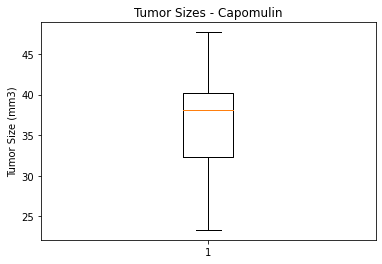

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes_Capomulin)
ax.set_title('Tumor Sizes - Capomulin')
ax.set_ylabel('Tumor Size (mm3)')
plt.show()

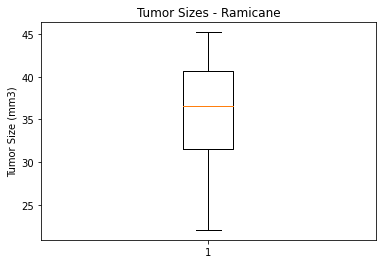

In [23]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes_Ramicane)
ax.set_title('Tumor Sizes - Ramicane')
ax.set_ylabel('Tumor Size (mm3)')
plt.show()

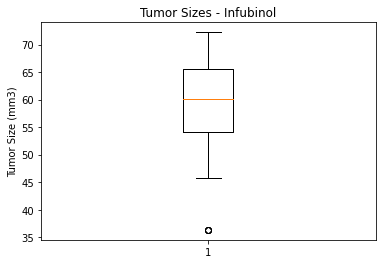

In [24]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes_Infubinol)
ax.set_title('Tumor Sizes - Infubinol')
ax.set_ylabel('Tumor Size (mm3)')
plt.show()

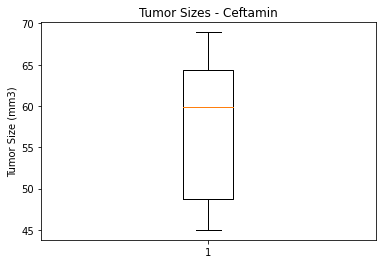

In [25]:
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes_Ceftamin)
ax.set_title('Tumor Sizes - Ceftamin')
ax.set_ylabel('Tumor Size (mm3)')
plt.show()

## Line and Scatter Plots

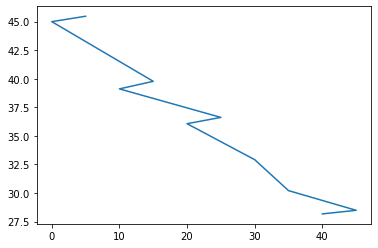

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "x401")]
plt.plot(Capomulin_df["Timepoint"], Capomulin_df["Tumor Volume (mm3)"])

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
plt.scatter(df["Weight (g)"], average_weight)

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
